# Check galaxy orientation and surface-level (order of magnitude) check of output arrays

In [1]:
import numpy as np
import h5py
import glob, os, re, sys

from PRFMData import PRFMDataset
import astro_helper as ah

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')
custom_colors = {
    'grey': '#3C3C3C',
    'turquoise': '#5E9F87'
}

In [2]:
ETG_vlM_nat = PRFMDataset(
    galaxy_type="ETG-vlM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_100.hdf5",
    realign_galaxy=False, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [3]:
ETG_medM_nat = PRFMDataset(
    galaxy_type="ETG-medM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_399.hdf5",
    realign_galaxy=False, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [4]:
ETG_vlM_rot = PRFMDataset(
    galaxy_type="ETG-vlM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_100.hdf5",
    realign_galaxy=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

In [5]:
ETG_medM_rot = PRFMDataset(
    galaxy_type="ETG-medM",
    total_height=0.3, # kpc
    Rmax=2., # kpc
    phibin_sep=np.pi/12.,
    snapname="snap-DESPOTIC_399.hdf5",
    realign_galaxy=True, # according to angular momentum vector of gas
    required_particle_types=[0,1,2,3,4], # just gas by default
)

# check that RBF interpolation for the potential is accurate

In [6]:
ptl_vlM = ETG_vlM_rot.get_potential_Rphiz()
print(np.shape(ptl_vlM))

(8, 24, 60)


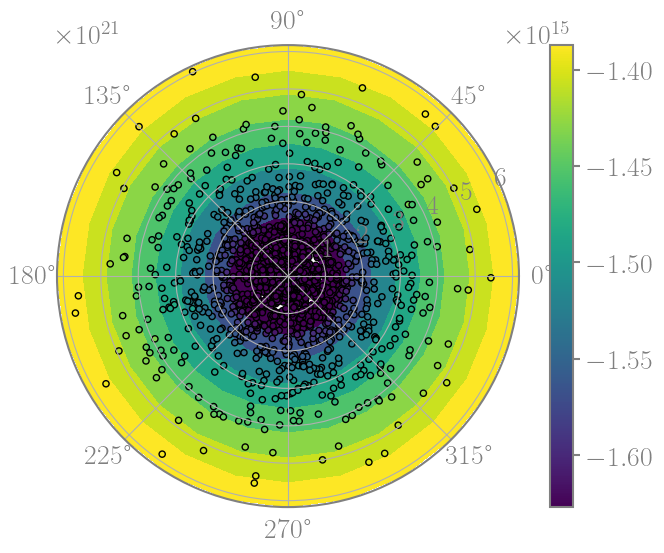

In [7]:
test_slice_z_idx = 12
z_grid = ETG_vlM_rot.zbin_centers_3d_ptl
test_min_z, test_max_z = np.min(z_grid[:,:,test_slice_z_idx]), np.max(z_grid[:,:,test_slice_z_idx])

real_gas_R = ETG_vlM_rot.read_snap_data(0)['R_coords']
cnd = (real_gas_R < np.max(ETG_vlM_rot.Rbin_edges))
real_gas_phi = ETG_vlM_rot.read_snap_data(0)['phi_coords'][cnd]
real_gas_ptl = ETG_vlM_rot.read_snap_data(0)['Potential'][cnd]
real_gas_R = real_gas_R[cnd]

plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
pcm = plt.pcolormesh(
    ETG_vlM_rot.phibin_centers, ETG_vlM_rot.Rbin_centers,
    ptl_vlM[:,:,test_slice_z_idx],
    cmap='viridis', shading='auto'
)
vmin = pcm.get_array().min()
vmax = pcm.get_array().max()
plt.scatter(
    real_gas_phi[::100], real_gas_R[::100],
    c=real_gas_ptl[::100], s=20,
    edgecolor='k', vmin=vmin, vmax=vmax
)
plt.colorbar()
plt.show()

In [8]:
ptl_medM = ETG_medM_rot.get_potential_Rphiz()
print(np.shape(ptl_medM))

(8, 24, 60)


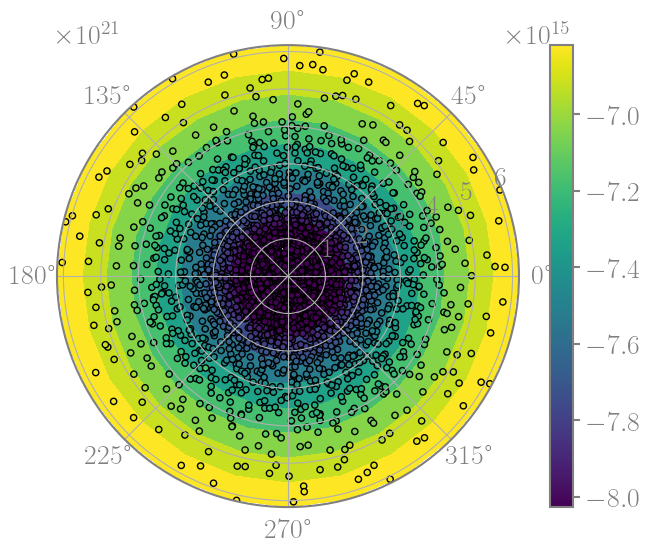

In [9]:
test_slice_z_idx = 12
z_grid = ETG_medM_rot.zbin_centers_3d_ptl
test_min_z, test_max_z = np.min(z_grid[:,:,test_slice_z_idx]), np.max(z_grid[:,:,test_slice_z_idx])

real_gas_R = ETG_medM_rot.read_snap_data(0)['R_coords']
cnd = (real_gas_R < np.max(ETG_medM_rot.Rbin_edges))
real_gas_phi = ETG_medM_rot.read_snap_data(0)['phi_coords'][cnd]
real_gas_ptl = ETG_medM_rot.read_snap_data(0)['Potential'][cnd]
real_gas_R = real_gas_R[cnd]

plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
pcm = plt.pcolormesh(
    ETG_medM_rot.phibin_centers, ETG_medM_rot.Rbin_centers,
    ptl_medM[:,:,test_slice_z_idx],
    cmap='viridis', shading='auto'
)
vmin = pcm.get_array().min()
vmax = pcm.get_array().max()
plt.scatter(
    real_gas_phi[::100], real_gas_R[::100],
    c=real_gas_ptl[::100], s=20,
    edgecolor='k', vmin=vmin, vmax=vmax
)
plt.colorbar()
plt.show()

# check that output arrays are reasonable

In [10]:
weight_vlM = ETG_vlM_rot.get_weight_Rphi()
weight_medM = ETG_medM_rot.get_weight_Rphi()

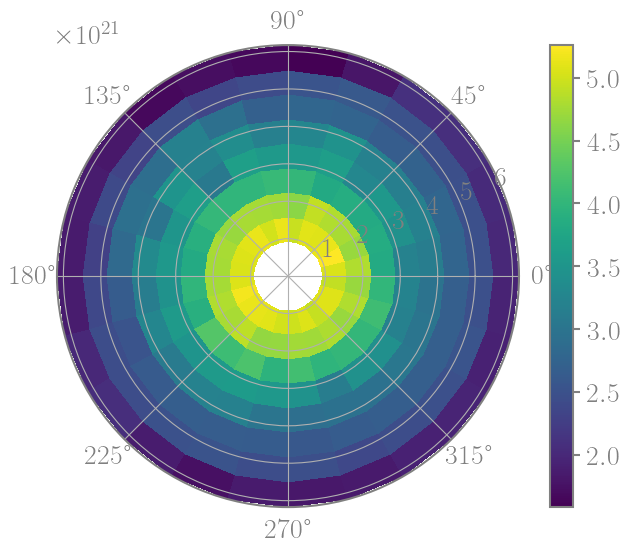

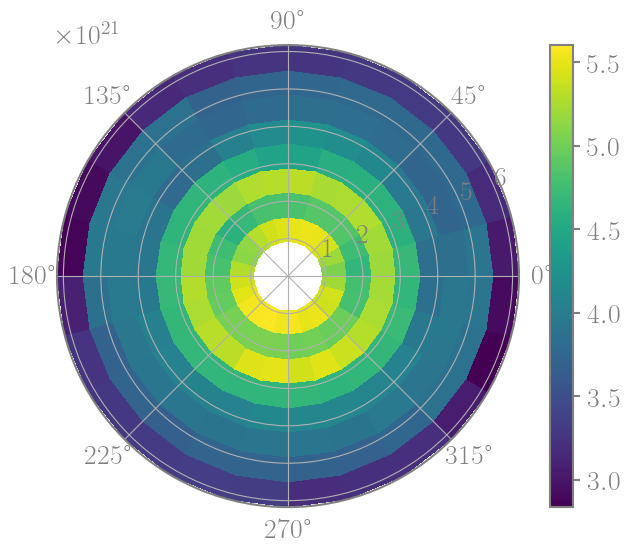

In [11]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_vlM_rot.phibin_centers, ETG_vlM_rot.Rbin_centers, np.log10(weight_vlM/ah.kB_cgs), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_medM_rot.phibin_centers, ETG_medM_rot.Rbin_centers, np.log10(weight_medM/ah.kB_cgs), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [12]:
gas_surfdens_vlM = ETG_vlM_rot.get_gas_surfdens_Rphi()
gas_surfdens_medM = ETG_medM_rot.get_gas_surfdens_Rphi()

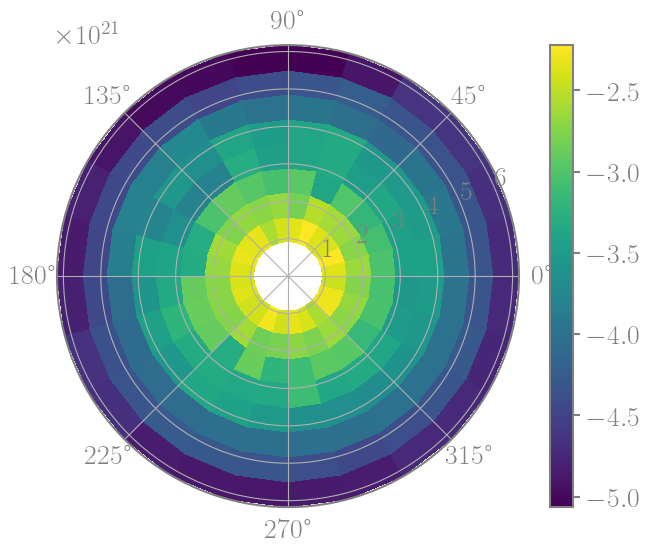

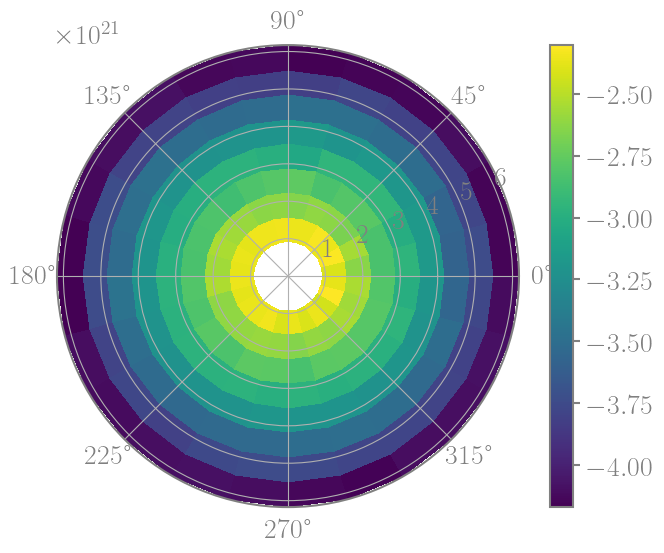

In [13]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_vlM_rot.phibin_centers, ETG_vlM_rot.Rbin_centers, np.log10(gas_surfdens_vlM), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_medM_rot.phibin_centers, ETG_medM_rot.Rbin_centers, np.log10(gas_surfdens_medM), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [6]:
stellar_surfdens_vlM = ETG_vlM_rot.get_stellar_surfdens_Rphi()
stellar_surfdens_medM = ETG_medM_rot.get_stellar_surfdens_Rphi()

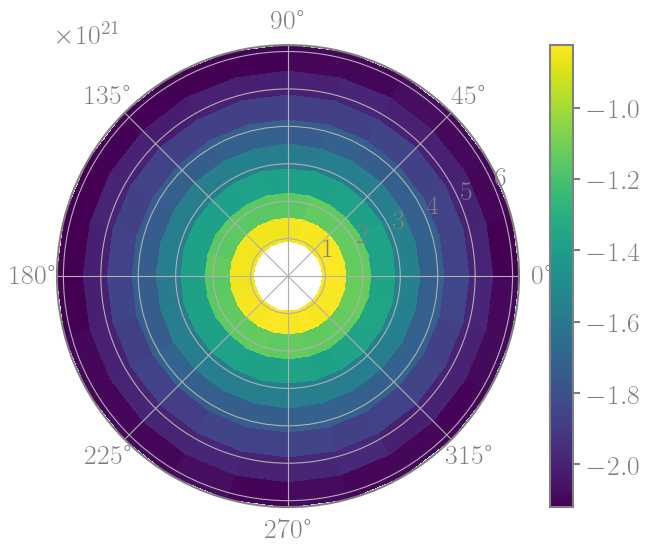

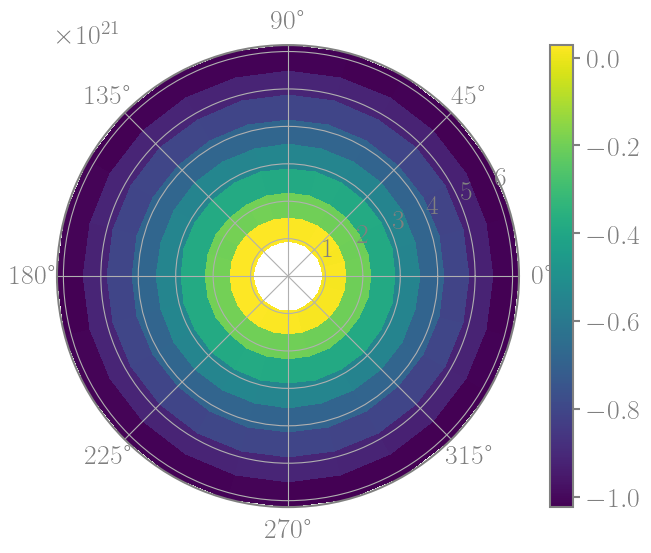

In [7]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_vlM_rot.phibin_centers, ETG_vlM_rot.Rbin_centers, np.log10(stellar_surfdens_vlM), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_medM_rot.phibin_centers, ETG_medM_rot.Rbin_centers, np.log10(stellar_surfdens_medM), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [8]:
SFR_surfdens_vlM = ETG_vlM_rot.get_SFR_surfdens_Rphi()
SFR_surfdens_medM = ETG_medM_rot.get_SFR_surfdens_Rphi()

/tmp/ipykernel_1475343/575338637.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(ETG_vlM_rot.phibin_centers, ETG_vlM_rot.Rbin_centers, np.log10(SFR_surfdens_vlM), cmap='viridis', shading='auto')


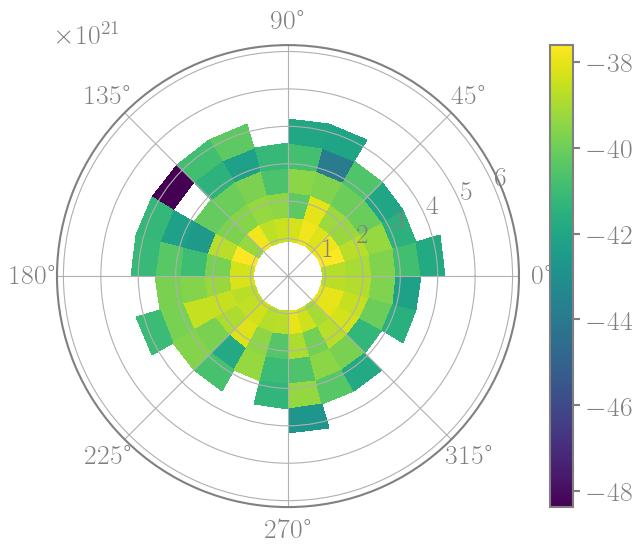

/tmp/ipykernel_1475343/575338637.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(ETG_medM_rot.phibin_centers, ETG_medM_rot.Rbin_centers, np.log10(SFR_surfdens_medM), cmap='viridis', shading='auto')


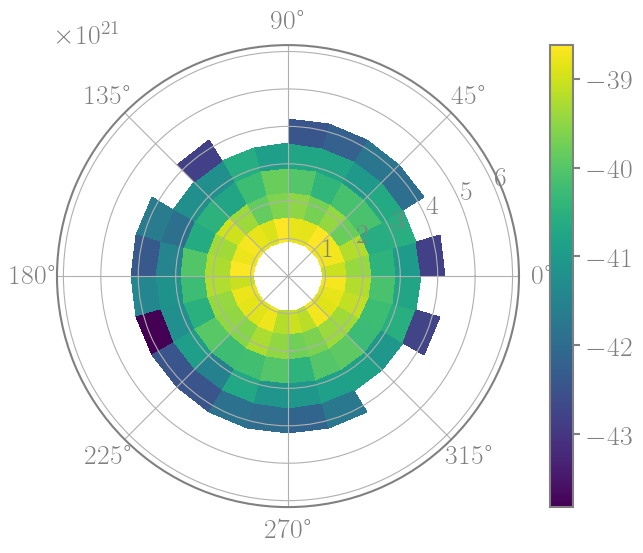

In [9]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_vlM_rot.phibin_centers, ETG_vlM_rot.Rbin_centers, np.log10(SFR_surfdens_vlM), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_medM_rot.phibin_centers, ETG_medM_rot.Rbin_centers, np.log10(SFR_surfdens_medM), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [10]:
Pturb_vlM = ETG_vlM_rot.get_gas_midplane_turbpress_Rphi()
Pturb_medM = ETG_medM_rot.get_gas_midplane_turbpress_Rphi()

/n/home03/sjeffreson/pressure_regulated_SF_analysis/PRFMData.py:363: RuntimeWarning: invalid value encountered in divide
  veldisps_xyz.append(np.sqrt(sumveldisp/summass))


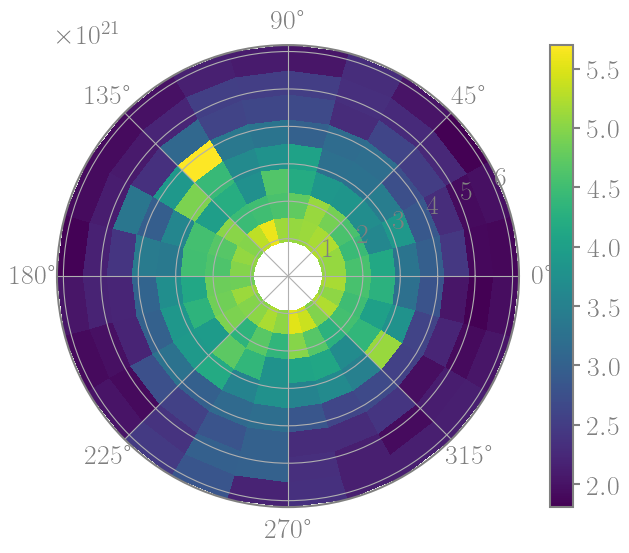

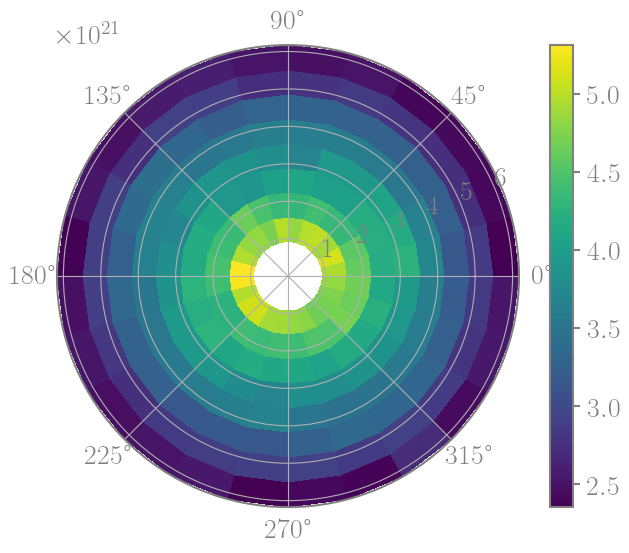

In [11]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_vlM_rot.phibin_centers, ETG_vlM_rot.Rbin_centers, np.log10(Pturb_vlM), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_medM_rot.phibin_centers, ETG_medM_rot.Rbin_centers, np.log10(Pturb_medM), cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [12]:
vdx_vlM, vdy_vlM, vdz_vlM = ETG_vlM_rot.get_gas_veldisps_xyz_Rphi()
vdx_medM, vdy_medM, vdz_medM = ETG_medM_rot.get_gas_veldisps_xyz_Rphi()

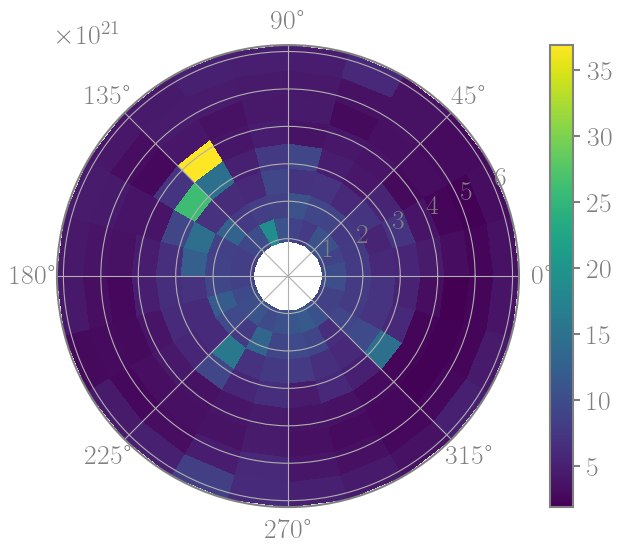

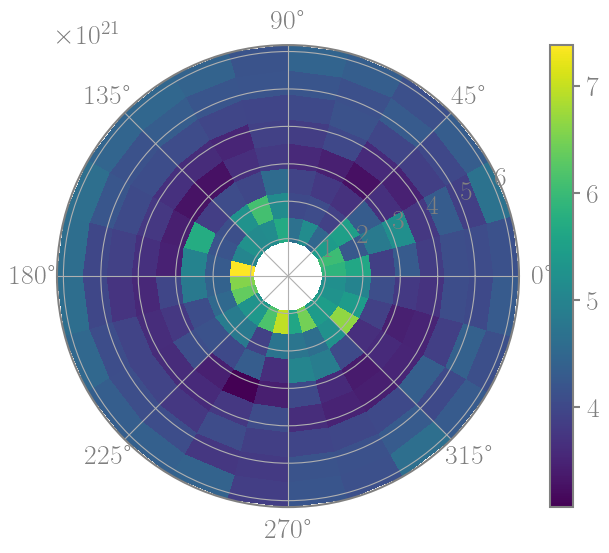

In [13]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_vlM_rot.phibin_centers, ETG_vlM_rot.Rbin_centers, vdz_vlM/ah.kms_to_cms, cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_medM_rot.phibin_centers, ETG_medM_rot.Rbin_centers, vdz_medM/ah.kms_to_cms, cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [14]:
vx_vlM, vy_vlM, vz_vlM = ETG_vlM_rot.get_gas_av_vel_xyz_Rphi()
vx_medM, vy_medM, vz_medM = ETG_medM_rot.get_gas_av_vel_xyz_Rphi()

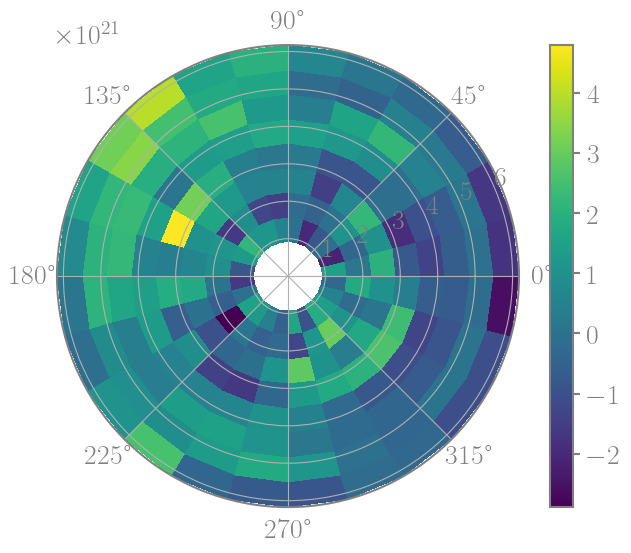

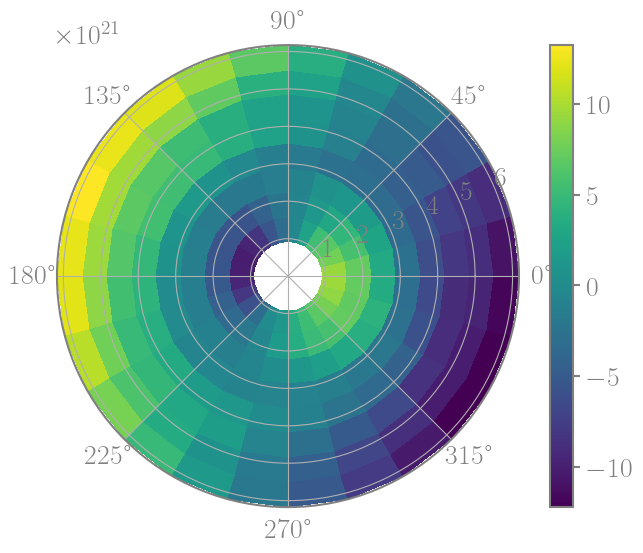

In [15]:
plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_vlM_rot.phibin_centers, ETG_vlM_rot.Rbin_centers, vz_vlM/ah.kms_to_cms, cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.subplot(111, polar=True)  # Set polar projection
plt.pcolormesh(ETG_medM_rot.phibin_centers, ETG_medM_rot.Rbin_centers, vz_medM/ah.kms_to_cms, cmap='viridis', shading='auto')
plt.colorbar()
plt.show()

In [16]:
vcs_vlM = ETG_vlM_rot.get_rotation_curve_R()
vcs_medM = ETG_medM_rot.get_rotation_curve_R()

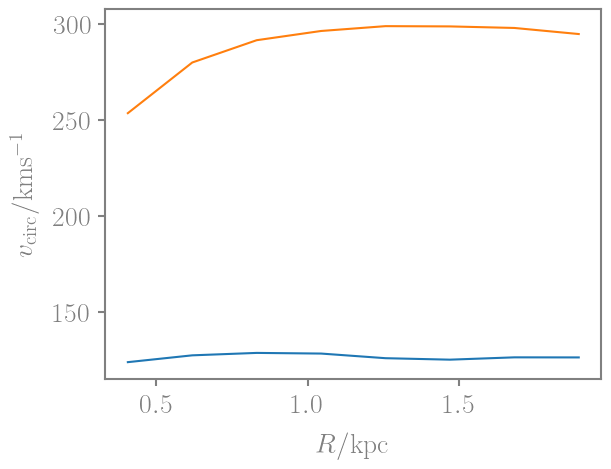

In [17]:
plt.plot(ETG_vlM_rot.Rbin_centers/ah.kpc_to_cm, vcs_vlM/ah.kms_to_cms)
plt.plot(ETG_medM_rot.Rbin_centers/ah.kpc_to_cm, vcs_medM/ah.kms_to_cms)
plt.xlabel(r'$R/{\rm kpc}$')
plt.ylabel(r'$v_{\rm circ}/{\rm kms^{-1}}$')
plt.show()

In [18]:
Omegas_vlM = ETG_vlM_rot.get_Omegaz_R()
Omegas_medM = ETG_medM_rot.get_Omegaz_R()

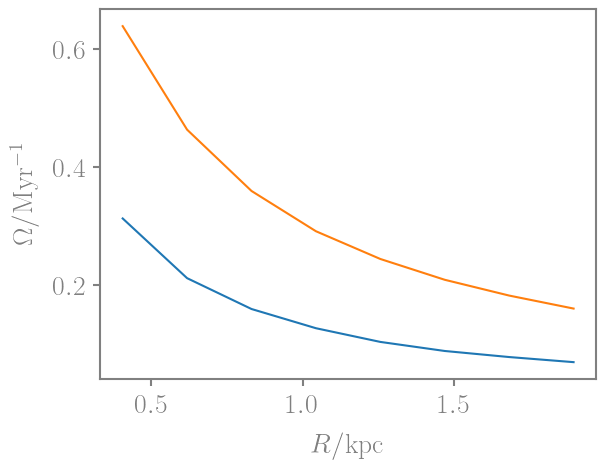

In [19]:
plt.plot(ETG_vlM_rot.Rbin_centers/ah.kpc_to_cm, Omegas_vlM*ah.Myr_to_s)
plt.plot(ETG_medM_rot.Rbin_centers/ah.kpc_to_cm, Omegas_medM*ah.Myr_to_s)
plt.xlabel(r'$R/{\rm kpc}$')
plt.ylabel(r'$\Omega/{\rm Myr^{-1}}$')
plt.show()

In [20]:
kappas_vlM = ETG_vlM_rot.get_kappa_R(wndwlen=3)
kappas_medM = ETG_medM_rot.get_kappa_R(wndwlen=3)

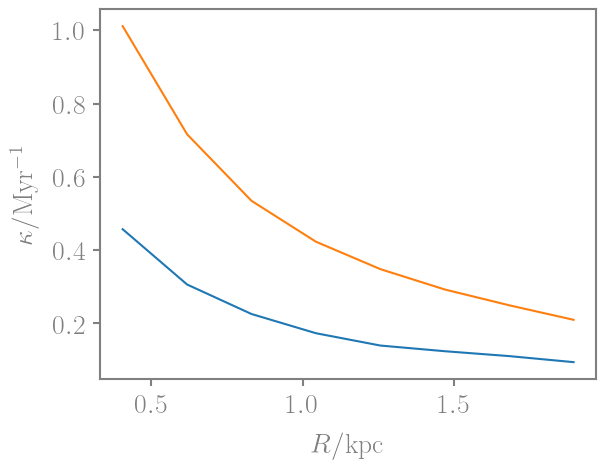

In [21]:
plt.plot(ETG_vlM_rot.Rbin_centers/ah.kpc_to_cm, kappas_vlM*ah.Myr_to_s)
plt.plot(ETG_medM_rot.Rbin_centers/ah.kpc_to_cm, kappas_medM*ah.Myr_to_s)
plt.xlabel(r'$R/{\rm kpc}$')
plt.ylabel(r'$\kappa/{\rm Myr^{-1}}$')
plt.show()

# check galaxies are being reoriented correctly via the angular momentum vector

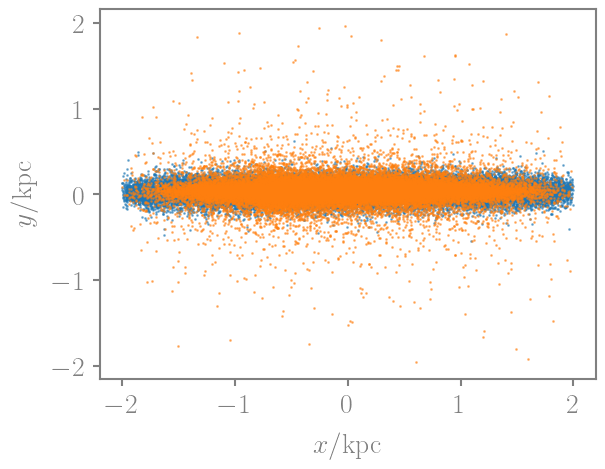

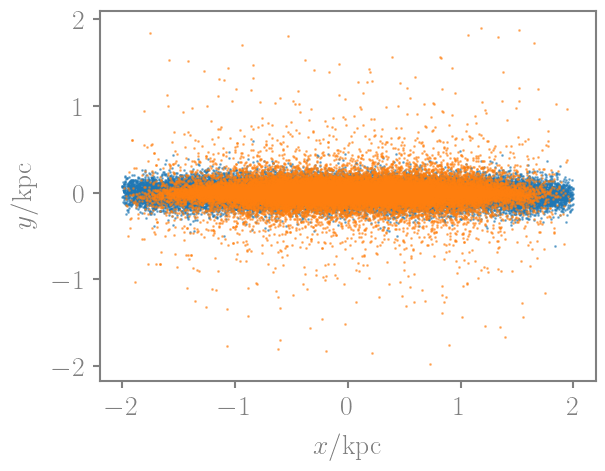

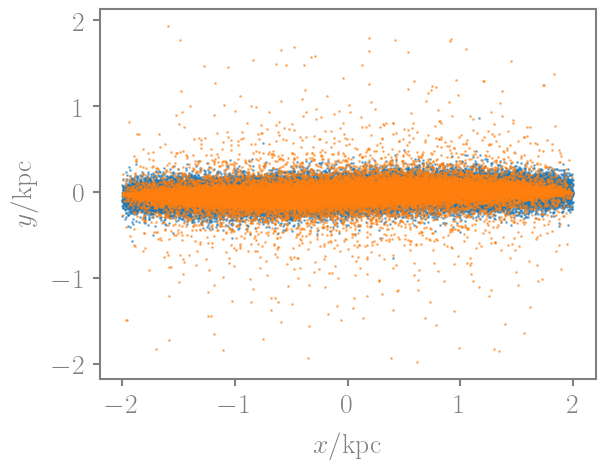

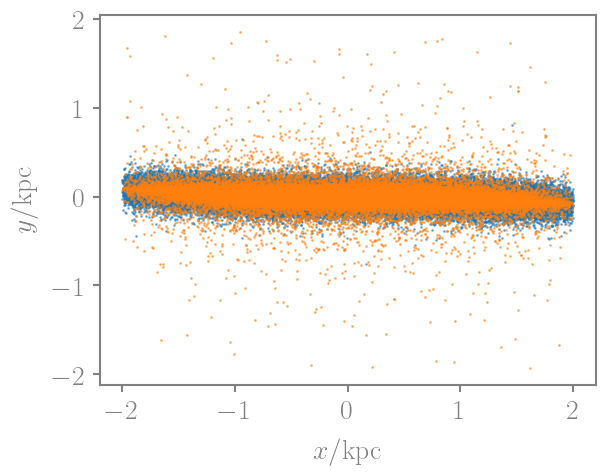

In [22]:
vlM_nat_gas = ETG_vlM_nat.cut_out_particles(PartType=0)
vlM_nat_disk = ETG_vlM_nat.cut_out_particles(PartType=2)

plt.scatter(vlM_nat_disk['y_coords']/ah.kpc_to_cm, vlM_nat_disk['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.scatter(vlM_nat_gas['y_coords']/ah.kpc_to_cm, vlM_nat_gas['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.xlabel(r'$x/{\rm kpc}$')
plt.ylabel(r'$y/{\rm kpc}$')
plt.show()

vlM_rot_gas = ETG_vlM_rot.cut_out_particles(PartType=0)
vlM_rot_disk = ETG_vlM_rot.cut_out_particles(PartType=2)

plt.scatter(vlM_rot_disk['y_coords']/ah.kpc_to_cm, vlM_rot_disk['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.scatter(vlM_rot_gas['y_coords']/ah.kpc_to_cm, vlM_rot_gas['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.xlabel(r'$x/{\rm kpc}$')
plt.ylabel(r'$y/{\rm kpc}$')
plt.show()

medM_nat_gas = ETG_medM_nat.cut_out_particles(PartType=0)
medM_nat_disk = ETG_medM_nat.cut_out_particles(PartType=2)

plt.scatter(medM_nat_disk['y_coords']/ah.kpc_to_cm, medM_nat_disk['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.scatter(medM_nat_gas['y_coords']/ah.kpc_to_cm, medM_nat_gas['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.xlabel(r'$x/{\rm kpc}$')
plt.ylabel(r'$y/{\rm kpc}$')
plt.show()

medM_rot_gas = ETG_medM_rot.cut_out_particles(PartType=0)
medM_rot_disk = ETG_medM_rot.cut_out_particles(PartType=2)

plt.scatter(medM_rot_disk['y_coords']/ah.kpc_to_cm, medM_rot_disk['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.scatter(medM_rot_gas['y_coords']/ah.kpc_to_cm, medM_rot_gas['z_coords']/ah.kpc_to_cm, s=1, alpha=0.5)
plt.xlabel(r'$x/{\rm kpc}$')
plt.ylabel(r'$y/{\rm kpc}$')
plt.show()